## Project Title: Jewelry Price Optimization with ML

##### Client: Gemineye
##### Domain: Retail – Luxury Goods & E-commerce
##### Objective: To develop a predictive pricing model for jewelry items based on product attributes and historical sales data using machine learning.

#### Introduction:
Gemineye is a premium jewelry brand specializing in customized and ready-to-sell products featuring diverse materials such as gold, silver, diamonds, and precious gems. With increasing competition in the luxury retail space, the company seeks to implement data-driven pricing mechanisms to optimize profitability without compromising on brand perception.

Jewelry pricing is traditionally determined through manual markup models or subjective expert judgment, which may not consistently reflect real-time market dynamics, customer preferences, or inventory pressure. This project aims to replace static pricing methods with a dynamic machine learning-based model capable of adjusting and recommending prices based on product features, market trends, and historical data.

##### Business Goals:
- Identify the key features that influence jewelry prices.
- Build a predictive model to estimate optimal pricing for new or existing products.
- Support data-driven decision-making for pricing, promotions, and inventory planning.
- Improve revenue and customer satisfaction by aligning prices with market expectations and perceived product value.

##### Stakeholders Expectations:
This project involves multiple stakeholders, each with distinct roles and expectations. 
- Head of Pricing Strategy: Seeks actionable price recommendations based on predictive modeling.
- Sales & Marketing Director: Expects insights on which features influence perceived value.
- Data Science Team	: Require a maintainable, trackable pipeline with performance benchmarks.
- Executive Leadership:	Interested in ROI through pricing accuracy and improved revenue margins.

##### Dataset Description:
* Order datetime -	Date product was ordered
* Order ID - Identifier for order
* Purchased product ID - Identifier for product ordered
* Quantity of SKU in the order - Amount of stock keeping unit ordered
* Category ID	- Jewelry category identifier
* Category alias -Jewelry category
* Brand ID - Brand identifier
* Price in USD	-Jewelry price
* User ID	- User identifier
* Product gender (for male/female) -Target gender for product
* Main Color - Main color of the jewelry piece
* Main metal - The main metal used for mounting of the piece
* Main gem - What gem type mounted on the jewelry piece

In [165]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split 
#from sklearn import metrics
from datetime import datetime
#from sklearn.metrics import r2_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error, mean_squared_error

In [166]:
import os
print(os.getcwd())

C:\Users\IfeomaAugustaAdigwe\Desktop\JewlryPriceOptimisation\notebooks


### The Jewelry Dataset

In [167]:
# import the dataset

data = pd.read_csv('../data/Jewelry_Dataset.csv', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [168]:
# Since the dataset didnt load with the correct headername, define correct column names as a list
columns = [
    "Order datetime",
    "Order ID",
    "Purchased product ID",
    "Quantity of SKU",
    "Category ID",
    "Category alias",
    "Brand ID",
    "Price in USD",
    "User ID",
    "Product gender",
    "Main Color",
    "Main metal",
    "Main gem"
]

data.columns = columns
data.head(3)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [169]:
data.tail(2)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
95909,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit
95910,2021-12-01 09:59:07 UTC,2719022379232658075,1956663846156370429,1,1.806829e+18,jewelry.pendant,1.0,97.12,1.515916e+18,NaN,red,gold,NaN


In [170]:
# Drop first row which contains old header
data = data.drop(index=0).reset_index(drop=True)

In [171]:
import warnings
warnings.filterwarnings("ignore")

### Data Ingestion

In [172]:
print(data.columns)

Index(['Order datetime', 'Order ID', 'Purchased product ID', 'Quantity of SKU',
       'Category ID', 'Category alias', 'Brand ID', 'Price in USD', 'User ID',
       'Product gender', 'Main Color', 'Main metal', 'Main gem'],
      dtype='object')


In [173]:
## Check the shape of the data

data.shape

(95910, 13)

In [174]:
data.describe()

,Order ID,Purchased product ID,Quantity of SKU,Category ID,Brand ID,Price in USD,User ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [175]:
## Check the info of the data

data.info

<bound method DataFrame.info of                 Order datetime             Order ID  Purchased product ID  \
0      2018-12-01 17:38:31 UTC  1924899396621697920   1806829193678291446   
1      2018-12-02 13:53:42 UTC  1925511016616034733   1842214461889315556   
2      2018-12-02 17:44:02 UTC  1925626951238681511   1835566849434059453   
3      2018-12-02 21:30:19 UTC  1925740842841014667   1873936840742928865   
4      2018-12-02 22:09:34 UTC  1925760595336888995   1835566854827934449   
...                        ...                  ...                   ...   
95905  2021-12-01 09:47:37 UTC  2719016587653808559   1515966223597820877   
95906  2021-12-01 09:50:37 UTC  2719018098886705639   1956663830729720074   
95907  2021-12-01 09:52:06 UTC  2719018846999544322   1956663848219968336   
95908  2021-12-01 09:55:35 UTC  2719020596963836492   1835566854106513435   
95909  2021-12-01 09:59:07 UTC  2719022379232658075   1956663846156370429   

       Quantity of SKU   Category ID    Cat

In [176]:
data.isnull()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,False,False,False,False,False,True,True,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95905,False,False,False,False,True,False,False,True,True,True,True,True,True
95906,False,False,False,False,False,True,False,False,False,True,False,False,True
95907,False,False,False,False,False,False,False,False,False,False,False,False,False
95908,False,False,False,False,False,False,False,False,False,True,False,False,False


In [177]:
# Show the missing values

data.isna().sum()

Order datetime              0
Order ID                    0
Purchased product ID        0
Quantity of SKU             0
Category ID              5352
Category alias           9933
Brand ID                 4785
Price in USD             5352
User ID                  5352
Product gender          48167
Main Color               7660
Main metal               5462
Main gem                34058
dtype: int64

<Axes: title={'center': 'Visualizing missing values'}>

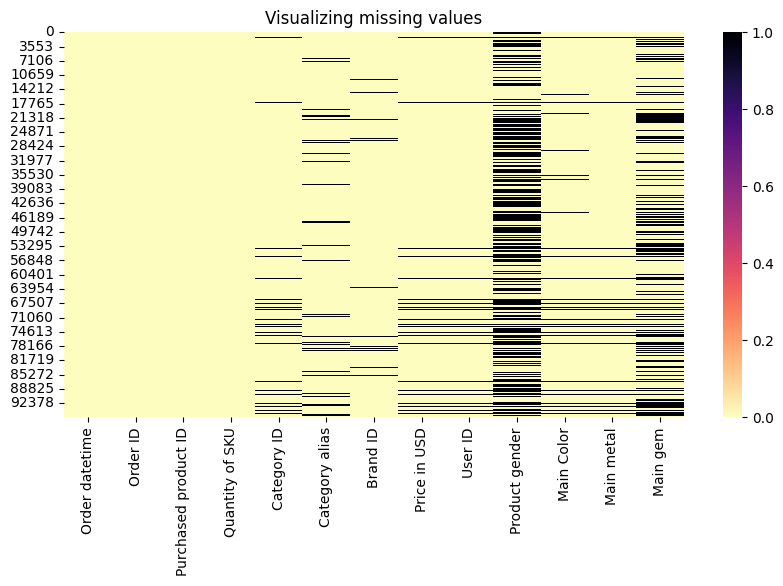

In [178]:
## Visualise missing value

plt.figure(figsize=(10, 5))
plt.title('Visualizing missing values')
sns.heatmap(data.isnull(), cbar=True, cmap='magma_r')
#plt.show() 

### Check for Unique values

In [179]:
data["Product gender"].unique()

array([nan, 'f', 'm'], dtype=object)

In [180]:
# Check for unique categories

print("Unique Categories:", data['Category alias'].nunique())
print("Unique Brands:", data['Brand ID'].nunique())
print("Unique Metals:", data['Main metal'].nunique())

Unique Categories: 218
Unique Brands: 2537
Unique Metals: 3


## Data Cleaning

#### Convert Data Types

In [181]:
# Convert data types
data['Order datetime'] = pd.to_datetime(data['Order datetime'])

In [182]:
# Convert numerical columns are in correct format - Price in USD
data['Price in USD'] = pd.to_numeric(data['Price in USD'], errors='coerce')

In [183]:
# Convert numerical columns are in correct format - Quantity of SKU in the order
data['Quantity of SKU'] = pd.to_numeric(data['Quantity of SKU'], errors='coerce')

#### Drop or Replace missing values

In [184]:
#Drop rows with missing target variable (Price in USD)
data = data.dropna(subset=['Price in USD'])
#data.head

In [185]:
# Fill missing values # Categorical values can be fill with 'Unknown'

data['Category alias'].fillna('Unknown', inplace=True)
data['Brand ID'].fillna('Unknown', inplace=True)
data['Main metal'].fillna('Unknown', inplace=True)
data['Main Color'].fillna('Unknown', inplace=True)
data['Product gender'].fillna('Unknown', inplace=True)
data['Main gem'].fillna('Unknown', inplace=True)
#data

In [186]:
# Drop Irrelevant columns - User ID & Category ID

data.drop(columns=['User ID'], inplace=True)
data.drop(columns=['Category ID'], inplace=True)

### Add a Month Column

In [187]:
# Create a Month Column

data['Month'] = data['Order datetime'].dt.month
data.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category alias,Brand ID,Price in USD,Product gender,Main Color,Main metal,Main gem,Month
0,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,Unknown,Unknown,212.14,Unknown,yellow,gold,Unknown,12
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire,12
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,red,gold,diamond,12
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,jewelry.necklace,0.0,417.67,Unknown,red,gold,amethyst,12
4,2018-12-02 22:09:34+00:00,1925760595336888995,1835566854827934449,1,jewelry.earring,1.0,102.27,Unknown,red,gold,Unknown,12


In [188]:
# Replace the month numbers with month names

data['MonthName'] = data['Month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Category alias,Brand ID,Price in USD,Product gender,Main Color,Main metal,Main gem,Month,MonthName
0,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,Unknown,Unknown,212.14,Unknown,yellow,gold,Unknown,12,December
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire,12,December
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,red,gold,diamond,12,December
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,jewelry.necklace,0.0,417.67,Unknown,red,gold,amethyst,12,December
4,2018-12-02 22:09:34+00:00,1925760595336888995,1835566854827934449,1,jewelry.earring,1.0,102.27,Unknown,red,gold,Unknown,12,December


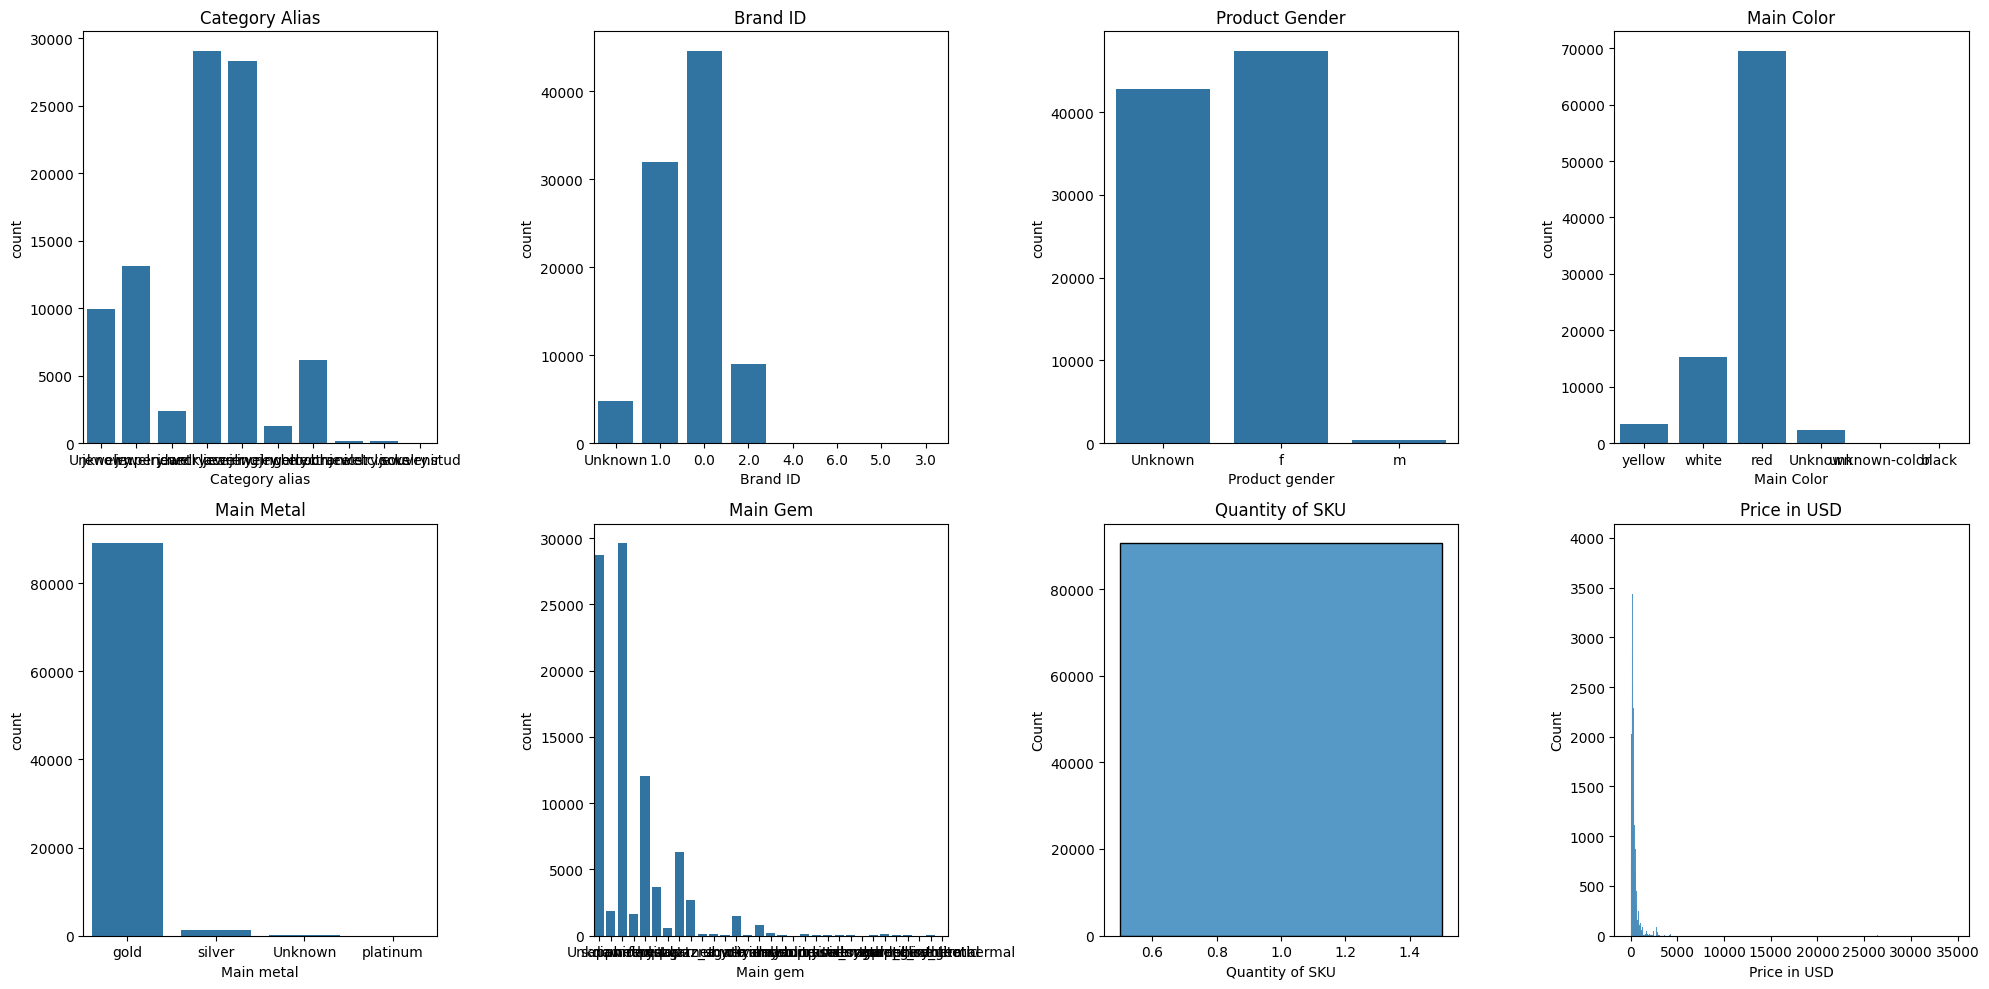

In [189]:
# Categorical and Numerical Columns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Categorical count plots
sns.countplot(x='Category alias', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Category Alias')

sns.countplot(x='Brand ID', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Brand ID')

sns.countplot(x='Product gender', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Product Gender')

sns.countplot(x='Main Color', data=data, ax=axes[0, 3])
axes[0, 3].set_title('Main Color')

sns.countplot(x='Main metal', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Main Metal')

sns.countplot(x='Main gem', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Main Gem')

# Numerical histograms
sns.histplot(data=data, x='Quantity of SKU', ax=axes[1, 2])
axes[1, 2].set_title('Quantity of SKU')

sns.histplot(data=data, x='Price in USD', ax=axes[1, 3])
axes[1, 3].set_title('Price in USD')

plt.tight_layout()
plt.show()


In [190]:
numeric_columns = data.select_dtypes(include=['number']).columns
print("Numeric Columns:\n", numeric_columns)


Numeric Columns:
 Index(['Order ID', 'Purchased product ID', 'Quantity of SKU', 'Price in USD',
       'Month'],
      dtype='object')


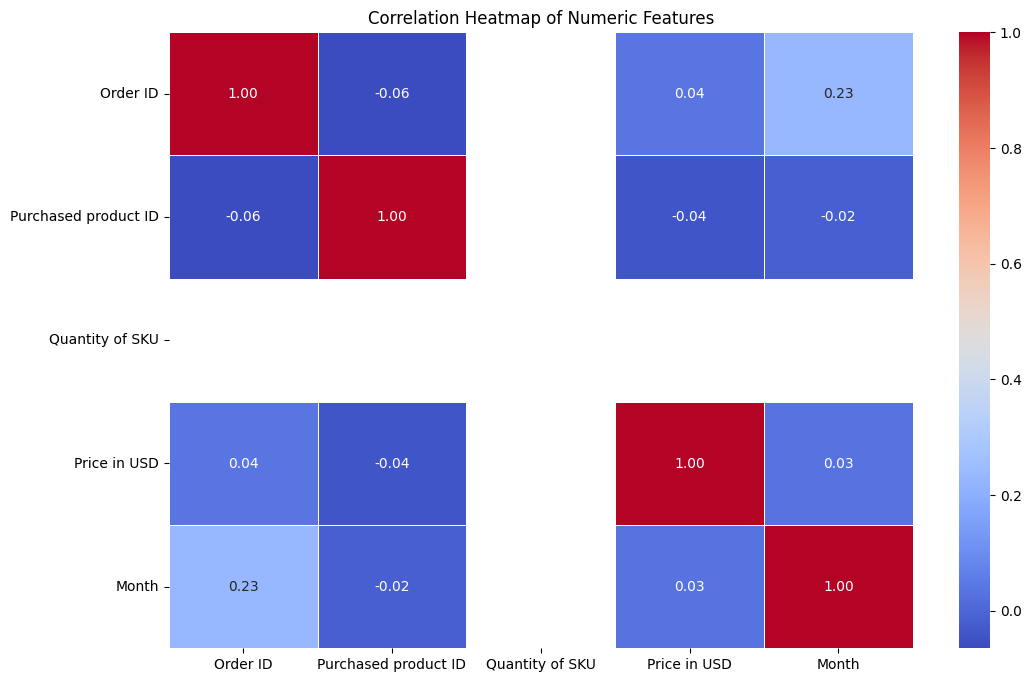

In [191]:
# Correlation Heatmap
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#### Distribution of Jewelry Prices

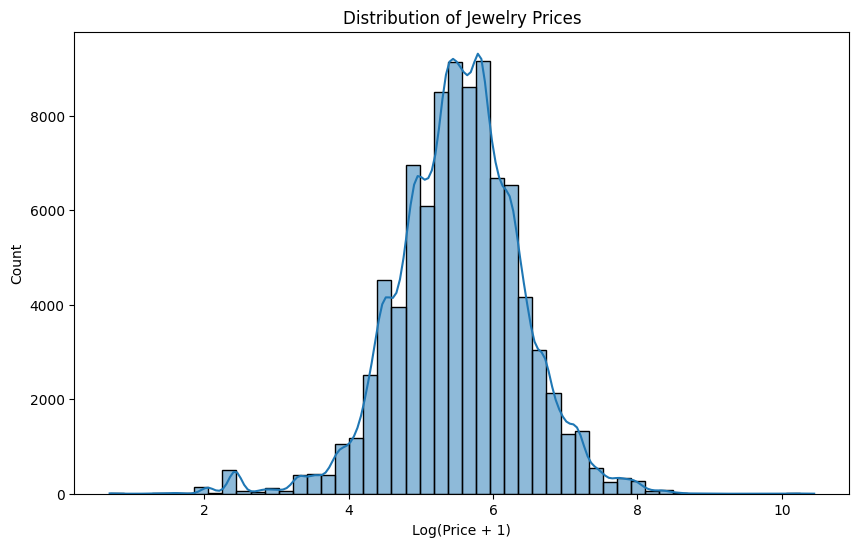

In [243]:
plt.figure(figsize=(10,6))
sns.histplot(data['Price in USD'].apply(lambda x: float(x)).apply(np.log1p), bins=50, kde=True)
plt.title('Distribution of Jewelry Prices')
plt.xlabel('Log(Price + 1)')
plt.show()

#### Demand Trends – Quantity Ordered by Product or Category

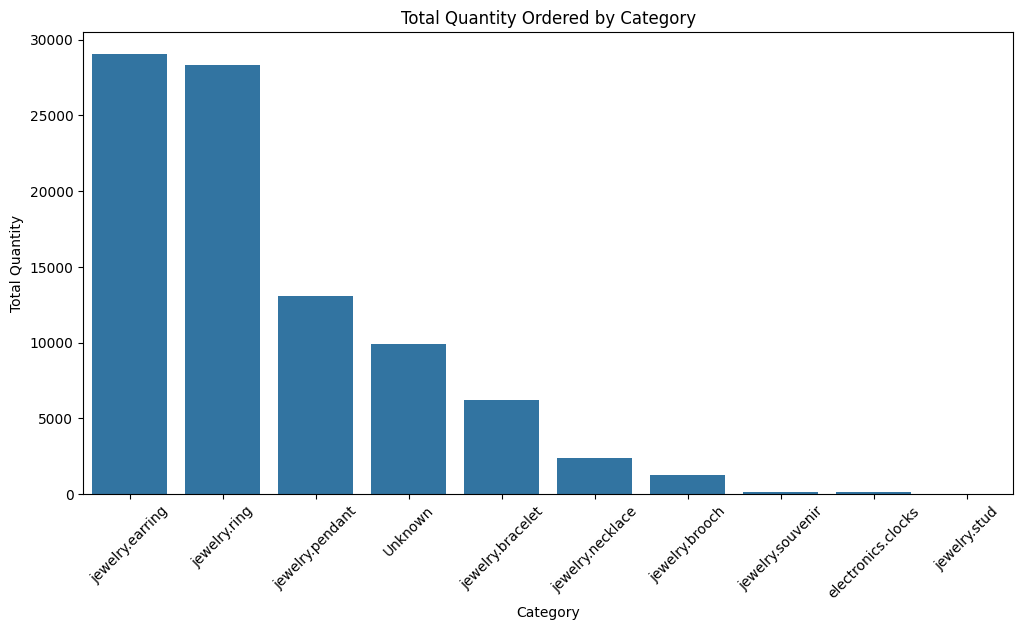

In [195]:
quantity_by_category = data.groupby('Category alias')['Quantity of SKU'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=quantity_by_category.index, y=quantity_by_category.values)
plt.xticks(rotation=45)
plt.title('Total Quantity Ordered by Category')
plt.ylabel('Total Quantity')
plt.xlabel('Category')
plt.show()

#### Average Price by Brand or Main Metal

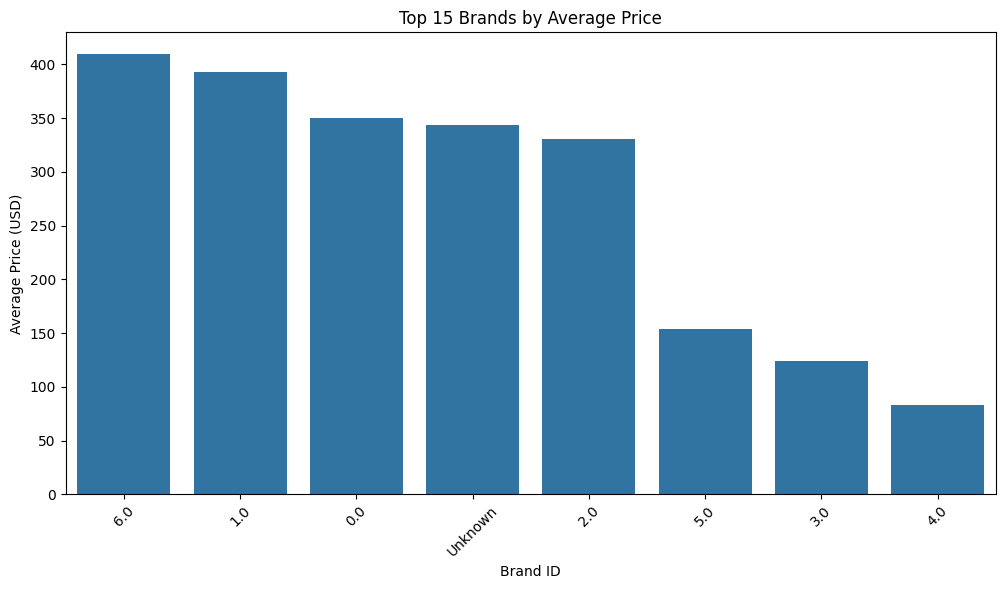

In [196]:
# Average price by brand
avg_price_brand = data.groupby('Brand ID')['Price in USD'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.title('Top 15 Brands by Average Price')
plt.ylabel('Average Price (USD)')
plt.xlabel('Brand ID')
plt.xticks(rotation=45)
plt.show()

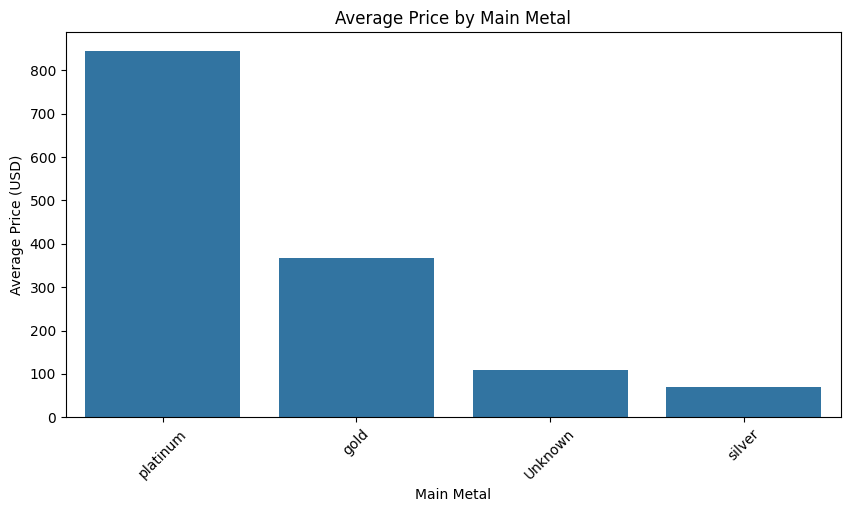

In [197]:
# Average price by metal
avg_price_metal = data.groupby('Main metal')['Price in USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_metal.index, y=avg_price_metal.values)
plt.title('Average Price by Main Metal')
plt.ylabel('Average Price (USD)')
plt.xlabel('Main Metal')
plt.xticks(rotation=45)
plt.show()

#### Time-based Analysis

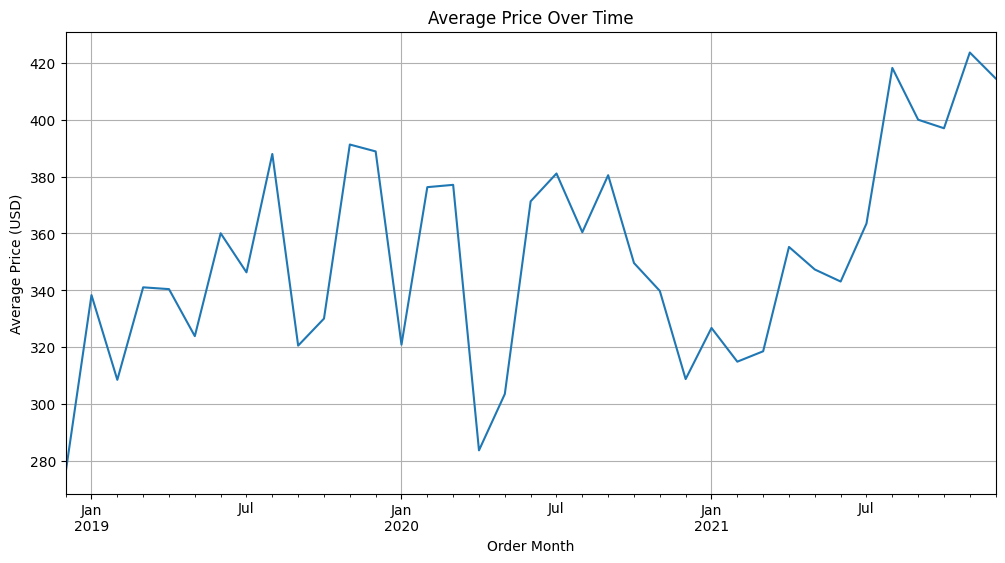

In [198]:
# Monthly price trends
data['Order Month'] = data['Order datetime'].dt.to_period('M')
monthly_avg_price = data.groupby('Order Month')['Price in USD'].mean()

monthly_avg_price.plot(kind='line', figsize=(12,6), title='Average Price Over Time')
plt.ylabel('Average Price (USD)')
plt.xlabel('Order Month')
plt.grid(True)
plt.show()

## Feature Engineering

In [199]:
#!pip install scikit-learn


In [200]:
from sklearn.preprocessing import OneHotEncoder

In [201]:
# Encode Categorical Variables

categorical_cols = [
    'Category alias', 
    'Brand ID', 
    'Product gender', 
    'Main Color', 
    'Main metal', 
    'Main gem'
]

# Used one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded

,Order datetime,Order ID,Purchased product ID,Quantity of SKU,Price in USD,Month,MonthName,Order Month,Category alias_electronics.clocks,Category alias_jewelry.bracelet,...,Main gem_quartz_smoky,Main gem_rhodolite,Main gem_ruby,Main gem_sapphire,Main gem_sapphire_geothermal,Main gem_sitall,Main gem_spinel,Main gem_topaz,Main gem_tourmaline,Main gem_turquoise
0,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,212.14,12,December,2018-12,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,54.66,12,December,2018-12,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,88.90,12,December,2018-12,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,417.67,12,December,2018-12,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018-12-02 22:09:34+00:00,1925760595336888995,1835566854827934449,1,102.27,12,December,2018-12,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95904,2021-12-01 09:43:25+00:00,2719014477910507865,1956663836392031039,1,134.29,12,December,2021-12,False,False,...,False,False,False,False,False,False,False,False,False,False
95906,2021-12-01 09:50:37+00:00,2719018098886705639,1956663830729720074,1,229.99,12,December,2021-12,False,False,...,False,False,False,False,False,False,False,False,False,False
95907,2021-12-01 09:52:06+00:00,2719018846999544322,1956663848219968336,1,630.00,12,December,2021-12,False,False,...,False,False,False,False,False,False,False,False,False,False
95908,2021-12-01 09:55:35+00:00,2719020596963836492,1835566854106513435,1,83.42,12,December,2021-12,False,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
# Date-Based Features

data_encoded['Order datetime'] = pd.to_datetime(data_encoded['Order datetime'])
data_encoded['Order Month'] = data_encoded['Order datetime'].dt.month
data_encoded['Order DayOfWeek'] = data_encoded['Order datetime'].dt.dayofweek


In [203]:
# One-hot encode 'MonthName' to handle non-numeric values
data_encoded = pd.get_dummies(data_encoded, columns=['MonthName'], drop_first=True)

# Define X and y for modeling
X = data_encoded.drop(columns=['Order ID', 'Purchased product ID', 'Order datetime', 'Price in USD'])
y = data_encoded['Price in USD'].astype(float)



### Train/Test Split

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
print('\n', X_train.head())
print('\n', X_test.head())
print('\n', y_train.head())
print('\n', y_test.head())


        Quantity of SKU  Month  Order Month  Category alias_electronics.clocks  \
26194                1      9            9                              False   
433                  1      1            1                              False   
90972                1     11           11                              False   
35722                1     12           12                              False   
81401                1     10           10                              False   

       Category alias_jewelry.bracelet  Category alias_jewelry.brooch  \
26194                            False                          False   
433                              False                          False   
90972                            False                          False   
35722                            False                          False   
81401                            False                          False   

       Category alias_jewelry.earring  Category alias_jewelry.necklace  

### Train my Model

#### Random Forest Regressor

In [206]:
# import the random forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [207]:
# Cretae model

RF_model = RandomForestRegressor()

In [208]:
# Fit the model

RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [209]:
# Create the prediction

RF_preds = RF_model.predict(X_test)

In [211]:
# Evaluate the Model

mae = mean_absolute_error(y_test, RF_preds)
mse = mean_squared_error(y_test, RF_preds)
r2 = r2_score(y_test, RF_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 158.92
Mean Squared Error: 101264.80
R2 Score: 0.28


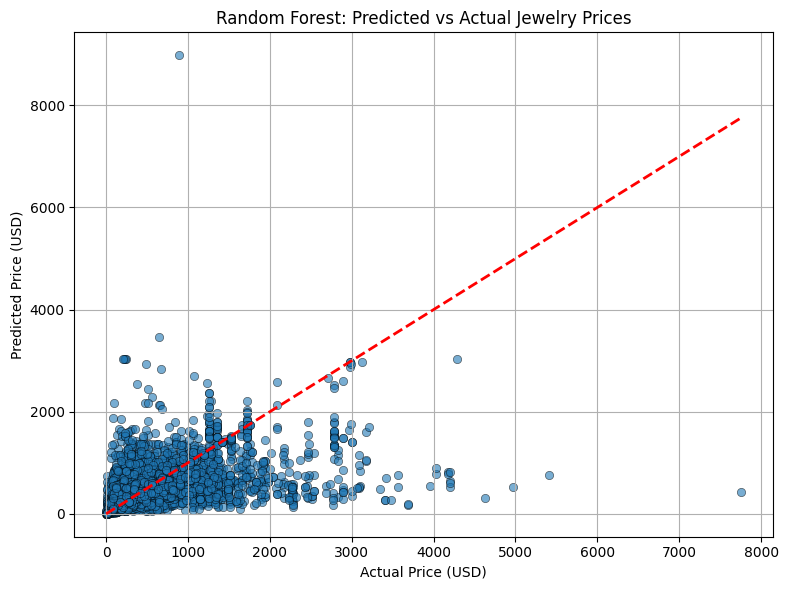

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=RF_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Random Forest: Predicted vs Actual Jewelry Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


#### CatBoost Regressor (CatBoostRegressor)

In [213]:
# !pip install catboost

In [214]:
# Import Libraries

from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Train the Model

In [215]:
# Create the model - CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0, random_state=42)


In [216]:
# Fit the model
cat_model.fit(X_train, y_train)


In [217]:
# Predict the test set
cat_preds = cat_model.predict(X_test)


In [218]:
# Evaluate the Model

mae = mean_absolute_error(y_test, cat_preds)
mse = mean_squared_error(y_test, cat_preds)
r2 = r2_score(y_test, cat_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 157.80
Mean Squared Error: 94664.57
R2 Score: 0.32


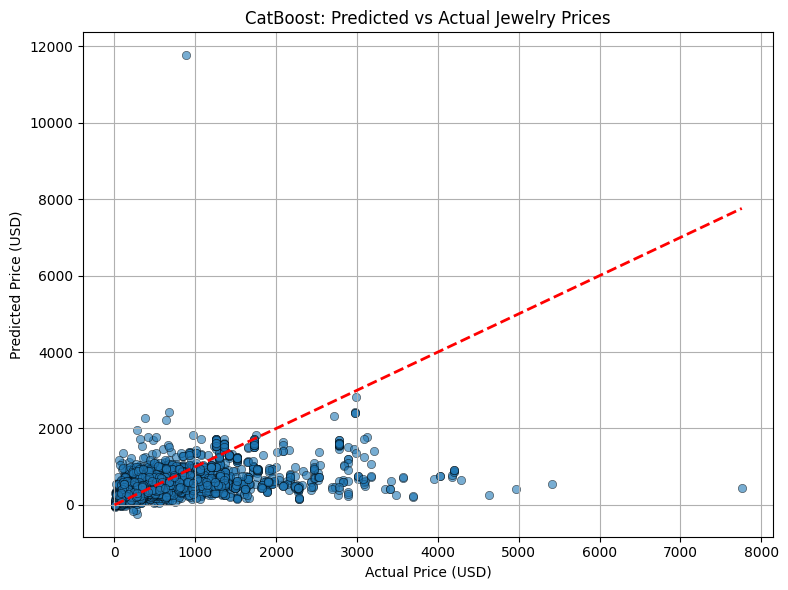

In [219]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=cat_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('CatBoost: Predicted vs Actual Jewelry Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Extra Trees Regressor

In [220]:
#!pip install scikit-learn


In [221]:
# Import Libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#### Train the Model

In [222]:
# Create the model - Extra Trees Regressor
et_model = ExtraTreesRegressor(random_state=42)

In [223]:
# Fit the model
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [224]:
# # Predict the test set
et_preds = et_model.predict(X_test)

In [225]:
# Evaluate the Model
mae = mean_absolute_error(y_test, et_preds)
mse = mean_squared_error(y_test, et_preds)
r2 = r2_score(y_test, et_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 160.17
Mean Squared Error: 105750.25
R2 Score: 0.25


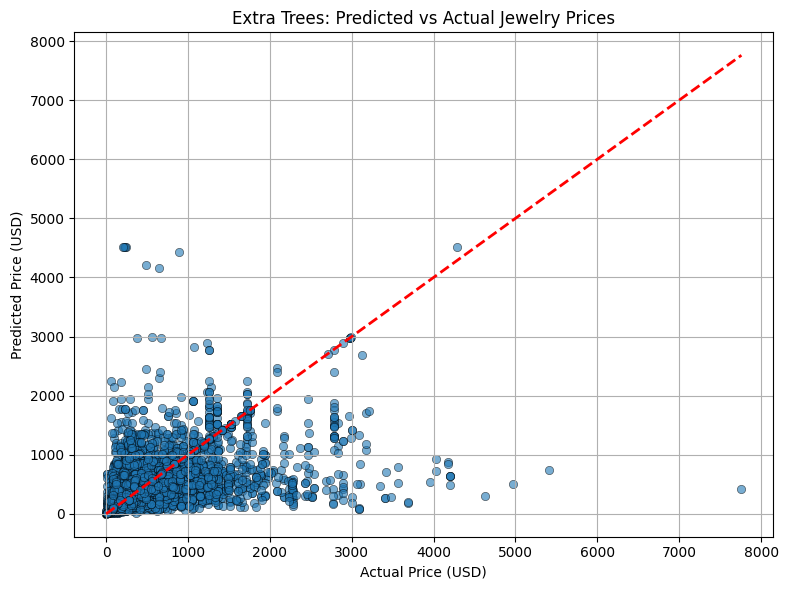

In [226]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=et_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Extra Trees: Predicted vs Actual Jewelry Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Lets compare the performance of the 3 models
-  Random Forest Regressor
- CatBoost Regressor
- ExtraTrees Regressor

In [227]:
model_results = {
    'Random Forest': {
        'MAE': mean_absolute_error(y_test, RF_preds),
        'MSE': mean_squared_error(y_test, RF_preds),
        'R2': r2_score(y_test, RF_preds)
    },
    'CatBoost': {
        'MAE': mean_absolute_error(y_test, cat_preds),
        'MSE': mean_squared_error(y_test, cat_preds),
        'R2': r2_score(y_test, cat_preds)
    },
    'Extra Trees': {
        'MAE': mean_absolute_error(y_test, et_preds),
        'MSE': mean_squared_error(y_test, et_preds),
        'R2': r2_score(y_test, et_preds)
    }
}


In [241]:
# Convert to DataFrame for Easy Plotting

results_data = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})
print(results_data)


           Model         MAE            MSE        R2
0  Random Forest  158.916071  101264.799912  0.277651
1       CatBoost  157.797691   94664.572279  0.324732
2    Extra Trees  160.167414  105750.250134  0.245655


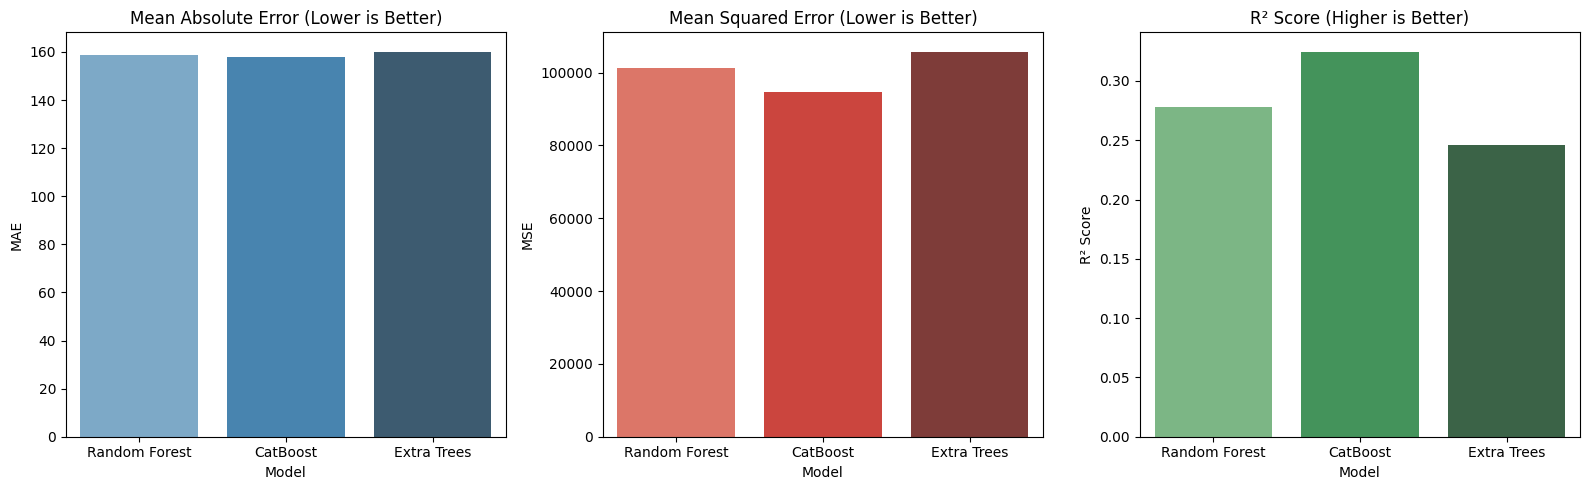

In [242]:
plt.figure(figsize=(16, 5))

# MAE - Mean Absolute Error
plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x='Model', y='MAE', palette='Blues_d')
plt.title('Mean Absolute Error (Lower is Better)')
plt.ylabel('MAE')

# MSE - Mean Squared Error
plt.subplot(1, 3, 2)
sns.barplot(data=results_df, x='Model', y='MSE', palette='Reds_d')
plt.title('Mean Squared Error (Lower is Better)')
plt.ylabel('MSE')

# R² Score
plt.subplot(1, 3, 3)
sns.barplot(data=results_df, x='Model', y='R2', palette='Greens_d')
plt.title('R² Score (Higher is Better)')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

### Log Models with MLflow

In [ ]:
#!pip install mlflow

In [234]:
# Import & Set Up MLflow

import mlflow
import mlflow.sklearn

In [235]:
mlflow.set_experiment("Jewelry Price Prediction Models")

2025/05/20 19:49:43 INFO mlflow.tracking.fluent: Experiment with name 'Jewelry Price Prediction Models' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/IfeomaAugustaAdigwe/Desktop/JewlryPriceOptimisation/notebooks/mlruns/376710469044946944', creation_time=1747763383009, experiment_id='376710469044946944', last_update_time=1747763383009, lifecycle_stage='active', name='Jewelry Price Prediction Models', tags={}>

##### Create a Logging Function

In [236]:


def log_model(model, model_name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Fit model
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Metrics
        mae = mean_absolute_error(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Log params, metrics, and model
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R2", r2)

        mlflow.sklearn.log_model(model, model_name)

        print(f"{model_name} logged to MLflow:")
        print(f"  MAE: {mae:.2f} | MSE: {mse:.2f} | R²: {r2:.2f}")


##### Log Each Model

In [238]:
# Random Forest Regressor

if mlflow.active_run():
    mlflow.end_run()  

log_model(RandomForestRegressor(random_state=42), "RandomForest", X_train, X_test, y_train, y_test)

2025/05/20 19:52:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest logged to MLflow:
  MAE: 159.03 | MSE: 102198.01 | R²: 0.27


In [239]:
# CatBoost Regressor

if mlflow.active_run():
    mlflow.end_run() 
    
log_model(CatBoostRegressor(verbose=0, random_state=42), "CatBoost", X_train, X_test, y_train, y_test)

2025/05/20 19:53:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CatBoost logged to MLflow:
  MAE: 157.80 | MSE: 94664.57 | R²: 0.32


In [240]:
# Extra Trees Regressor

if mlflow.active_run():
    mlflow.end_run() 
    
log_model(ExtraTreesRegressor(random_state=42), "ExtraTrees", X_train, X_test, y_train, y_test)

2025/05/20 19:54:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


ExtraTrees logged to MLflow:
  MAE: 160.17 | MSE: 105750.25 | R²: 0.25
